In [1]:
%matplotlib inline

import torch
from collections import defaultdict
import pickle
import os

import training
import benchmark


# add parent directoru path and import Snake env
import sys
sys.path.append('..')
from envs.snake import Snake

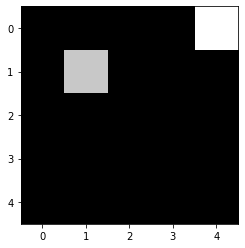

steps_without_gain: 0
direction: 0
target: (0, 4)
target_distance: (-1, 3)
obstacle_distance: (1, 1, 3)


In [2]:
env = Snake(side=5)
env.render()

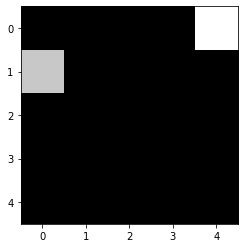

steps_without_gain: 1
direction: 1
target: (0, 4)
target_distance: (-1, 4)
obstacle_distance: (3, 0, 1)


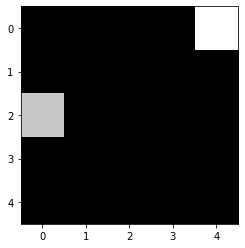

steps_without_gain: 2
direction: 2
target: (0, 4)
target_distance: (-2, 4)
obstacle_distance: (4, 2, 4)


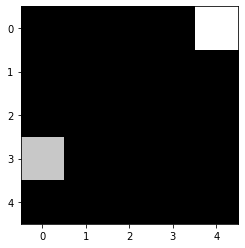

steps_without_gain: 3
direction: 2
target: (0, 4)
target_distance: (-3, 4)
obstacle_distance: (4, 1, 4)


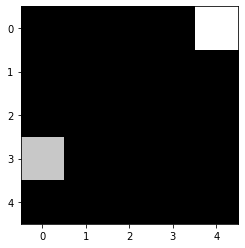

steps_without_gain: 3
direction: 1
target: (0, 4)
target_distance: (-3, 4)
obstacle_distance: (1, 0, 3)


In [3]:
done = False
while not done:
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    env.render()

## Train model

### Create environment

In [4]:
env = Snake(side=10)

### Recover saved Q-Table if exists

In [5]:
save_file = 'Snake_saved/Snake-qtable.pkl'

if os.path.exists(save_file):
    with open(save_file, 'rb') as f:
        mk_entry = lambda: torch.zeros((env.action_space.n,))
        q_table = defaultdict(mk_entry, pickle.load(f)) 
else:
    q_table = None

### Fit Q-Table

In [7]:
best_score, q_table = training.fit(env, q_table, episodes=500_000, epsilon_min=0.09, epsilon_decay=0.99, learning_rate=0.1)

Episode 1000: New best score! -96.0
Episode 2000: New best score! -92.0
Episode 3000: New best score! -90.0
Episode 4000: New best score! -89.0
Episode 6000: New best score! -88.0
Episode 8000: New best score! -79.0
Episode 9000: New best score! -65.0
Episode 13000: New best score! -58.0
Episode 14000: New best score! -54.0
Episode 16000: New best score! -39.0
Episode 17000: New best score! -28.0
Episode 18000: New best score! -23.0
Episode 20000: New best score! 6.0
Episode 21000: New best score! 7.0
Episode 23000: New best score! 47.0
Episode 26000: New best score! 53.0
Episode 30000: New best score! 55.0
Episode 32000: New best score! 78.0
Episode 34000: New best score! 99.0
Episode 37000: New best score! 119.0
Episode 39000: New best score! 125.0
Episode 41000: New best score! 137.0
Episode 45000: New best score! 164.0
Episode 47000: New best score! 169.0
Episode 49000: New best score! 203.0
Episode 56000: New best score! 210.0
Episode 57000: New best score! 223.0
Episode 59000: Ne

### Save Q-Table

In [ ]:
with open(save_file, 'wb') as f:
    pickle.dump(dict(q_table), f)

### Play an episode

In [ ]:
from IPython.display import clear_output
import time
import torch

env = Snake(side=10, max_steps_without_gain=1000)
state = env.reset()
done = False
while not done:
    action = torch.argmax(q_table[state]).item()
    state, _, done, _ = env.step(action)
    clear_output()
    env.render()
    time.sleep(0.15)
    